In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv(r'C:\Users\admin\Desktop\3.12.%20Example.csv')

In [3]:
df.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


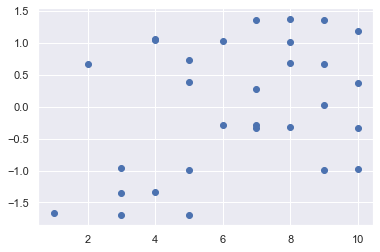

In [4]:
plt.scatter(df['Satisfaction'],df['Loyalty'])

In [6]:
x=df.copy()

In [7]:
kmeans=KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
data=x.copy()
data['clusters']=kmeans.fit_predict(x)

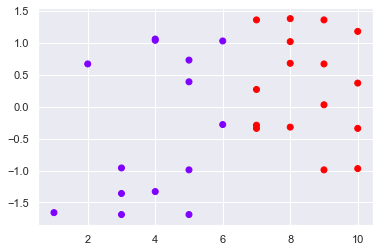

In [11]:
plt.scatter(data['Satisfaction'],data['Loyalty'],c=data['clusters'],cmap='rainbow')

In [12]:
from sklearn import preprocessing

In [13]:
x_scaled=preprocessing.scale(x)

In [14]:
wcss=[]
for i in range(1,10):
    kmeans=KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

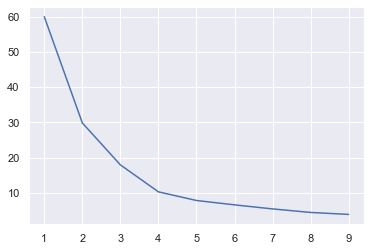

In [15]:
plt.plot(range(1,10),wcss)

In [21]:
kmeans_new=KMeans(4)
kmeans_new.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
clustr=x.copy()

In [23]:
clustr['cluster_pred']=kmeans_new.fit_predict(x_scaled)

In [24]:
clustr

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,2
1,6,-0.28,3
2,5,-0.99,2
3,7,-0.29,3
4,4,1.06,0
5,1,-1.66,2
6,10,-0.97,3
7,8,-0.32,3
8,8,1.02,1
9,8,0.68,1


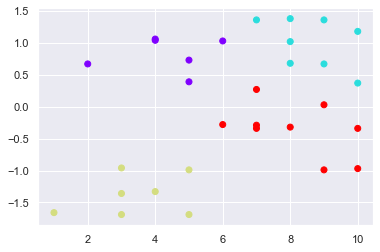

In [25]:
plt.scatter(clustr['Satisfaction'],clustr['Loyalty'],c=clustr['cluster_pred'],cmap='rainbow')